In [1]:
import pandas as pd
import numpy as np

In [2]:
data_item = pd.read_csv("item_to_id.csv")
data_item.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [3]:
print('Number of ROws and Columns '+str(data_item.shape))
print('\n')
print('columns')
print(data_item.columns)
print('\n')
data_item.describe(include='all')

Number of ROws and Columns (48, 2)


columns
Index(['Item_name', 'Item_id'], dtype='object')




,Item_name,Item_id
count,48,48.00
unique,48,NaN
top,frozen vegetables,NaN
freq,1,NaN
mean,NaN,24.50
std,NaN,14.00
min,NaN,1.00
25%,NaN,12.75
50%,NaN,24.50
75%,NaN,36.25


Total 48 items and all are unique

In [4]:
data_purch_hist = pd.read_csv("purchase_history.csv")
data_purch_hist.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [5]:
print('Number of ROws and Columns '+str(data_purch_hist.shape))
print('\n')
print('columns')
print(data_purch_hist.columns)
print('\n')
data_purch_hist.describe(include='all')

Number of ROws and Columns (39474, 2)


columns
Index(['user_id', 'id'], dtype='object')




,user_id,id
count,3.947400e+04,39474
unique,NaN,37309
top,NaN,2
freq,NaN,58
mean,7.520149e+05,NaN
std,4.337258e+05,NaN
min,4.700000e+01,NaN
25%,3.735672e+05,NaN
50%,7.535835e+05,NaN
75%,1.124939e+06,NaN


In [6]:
len(data_purch_hist['user_id'].unique())

24885

Total number of unique customers are 24885. So there is a chance that same customer have multiple rows. Let's try to merge that one

# Data Cleaning

In [7]:
data_pur_new = data_purch_hist.groupby(['user_id','id']).head()
data_pur_new.shape

(39474, 2)

The unique values of both columns are same as number of records. So there is no duplciate data. Only customers have more purchase orders. let's try to merge them

In [8]:
# https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
data_pur_new = data_purch_hist.groupby('user_id')['id'].apply(lambda x:','.join(x)).reset_index()
data_pur_new.head()

,user_id,id
0,47,"3,4,2,13,44,16,24,28,23,45,15,46,25"
1,68,"23,10,42,39,19,6,17,25"
2,113,"46,33,30,32,43,9,38,21,15,3,25"
3,123,"4,10,27,18"
4,223,"1,6,35,29,41,45,32,17,2,22,38"


In [9]:
data_pur_new['id'] = data_pur_new['id'].apply(lambda x:','+x+',')

In [10]:
print('Number of ROws and Columns '+str(data_pur_new.shape))
print('\n')
print('columns')
print(data_pur_new.columns)
print('\n')
data_pur_new.describe(include='all')

Number of ROws and Columns (24885, 2)


columns
Index(['user_id', 'id'], dtype='object')




,user_id,id
count,2.488500e+04,24885
unique,NaN,24299
top,NaN,"2,"
freq,NaN,19
mean,7.508893e+05,NaN
std,4.336508e+05,NaN
min,4.700000e+01,NaN
25%,3.737880e+05,NaN
50%,7.512480e+05,NaN
75%,1.122789e+06,NaN


now the number of rows are 24885

Let's try to add the count of each customer

In [11]:
data_pur_new['count'] = data_pur_new['id'].apply(lambda x : x.count(','))

In [12]:
data_pur_new.head()

,user_id,id,count
0,47,"3,4,2,13,44,16,24,28,23,45,15,46,25,",13
1,68,"23,10,42,39,19,6,17,25,",8
2,113,"46,33,30,32,43,9,38,21,15,3,25,",11
3,123,"4,10,27,18,",4
4,223,"1,6,35,29,41,45,32,17,2,22,38,",11


the customer who bought the most items overall in her lifetime,

In [13]:
max_id = data_pur_new['count'].idxmax()
data_pur_new.iloc[max_id][['user_id','count']]

user_id    269335
count          72
Name: 4445, dtype: object

Customer id 269335 has bought 72 items

for each item, the customer who bought that product the most

In [14]:
for i in data_item.values:
#     print(i)
    data_pur_new[i[0]] = [j[1].count(','+str(i[1])+',') for j in data_pur_new.values] 
data_pur_new.head()

,user_id,id,count,coffee,tea,juice,soda,sandwich loaves,dinner rolls,tortillas,...,paper towels,toilet paper,aluminum foil,sandwich bags,shampoo,soap,hand soap,shaving cream,baby items,pet items
0,47,"3,4,2,13,44,16,24,28,23,45,15,46,25,",13,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,68,"23,10,42,39,19,6,17,25,",8,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,113,"46,33,30,32,43,9,38,21,15,3,25,",11,1,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,123,"4,10,27,18,",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,223,"1,6,35,29,41,45,32,17,2,22,38,",11,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [26]:
max_buyers = {}
for i in data_item.values:
     max_buyers[i[0]] = (data_pur_new['user_id'][data_pur_new[i[0]].idxmax()])
max_buyers

{'coffee': 996380,
 'tea': 920002,
 'juice': 255546,
 'soda': 269335,
 'sandwich loaves': 599172,
 'dinner rolls': 46757,
 'tortillas': 305916,
 'bagels': 820788,
 'canned vegetables': 238495,
 'spaghetti sauce': 967573,
 'ketchup': 133355,
 'cheeses': 884172,
 'eggs': 172120,
 'milk': 73071,
 'yogurt': 335841,
 'butter': 151926,
 'cereals': 367872,
 'flour': 21779,
 'sugar': 540483,
 'pasta': 289360,
 'waffles': 217277,
 'frozen vegetables': 1199670,
 'ice cream': 269335,
 'poultry': 1151741,
 'beef': 366155,
 'pork': 384935,
 'bananas': 1218645,
 'berries': 38872,
 'cherries': 109578,
 'grapefruit': 885474,
 'apples': 109578,
 'broccoli': 31625,
 'carrots': 618914,
 'cauliflower': 1198106,
 'cucumbers': 80215,
 'lettuce': 31625,
 'laundry detergent': 917199,
 'dishwashing\xa0': 956666,
 'paper towels': 189913,
 'toilet paper': 1310207,
 'aluminum foil': 143741,
 'sandwich bags': 312711,
 'shampoo': 557904,
 'soap': 450482,
 'hand soap': 394348,
 'shaving cream': 31625,
 'baby items':

In [29]:
import matplotlib.pyplot as plt


[]

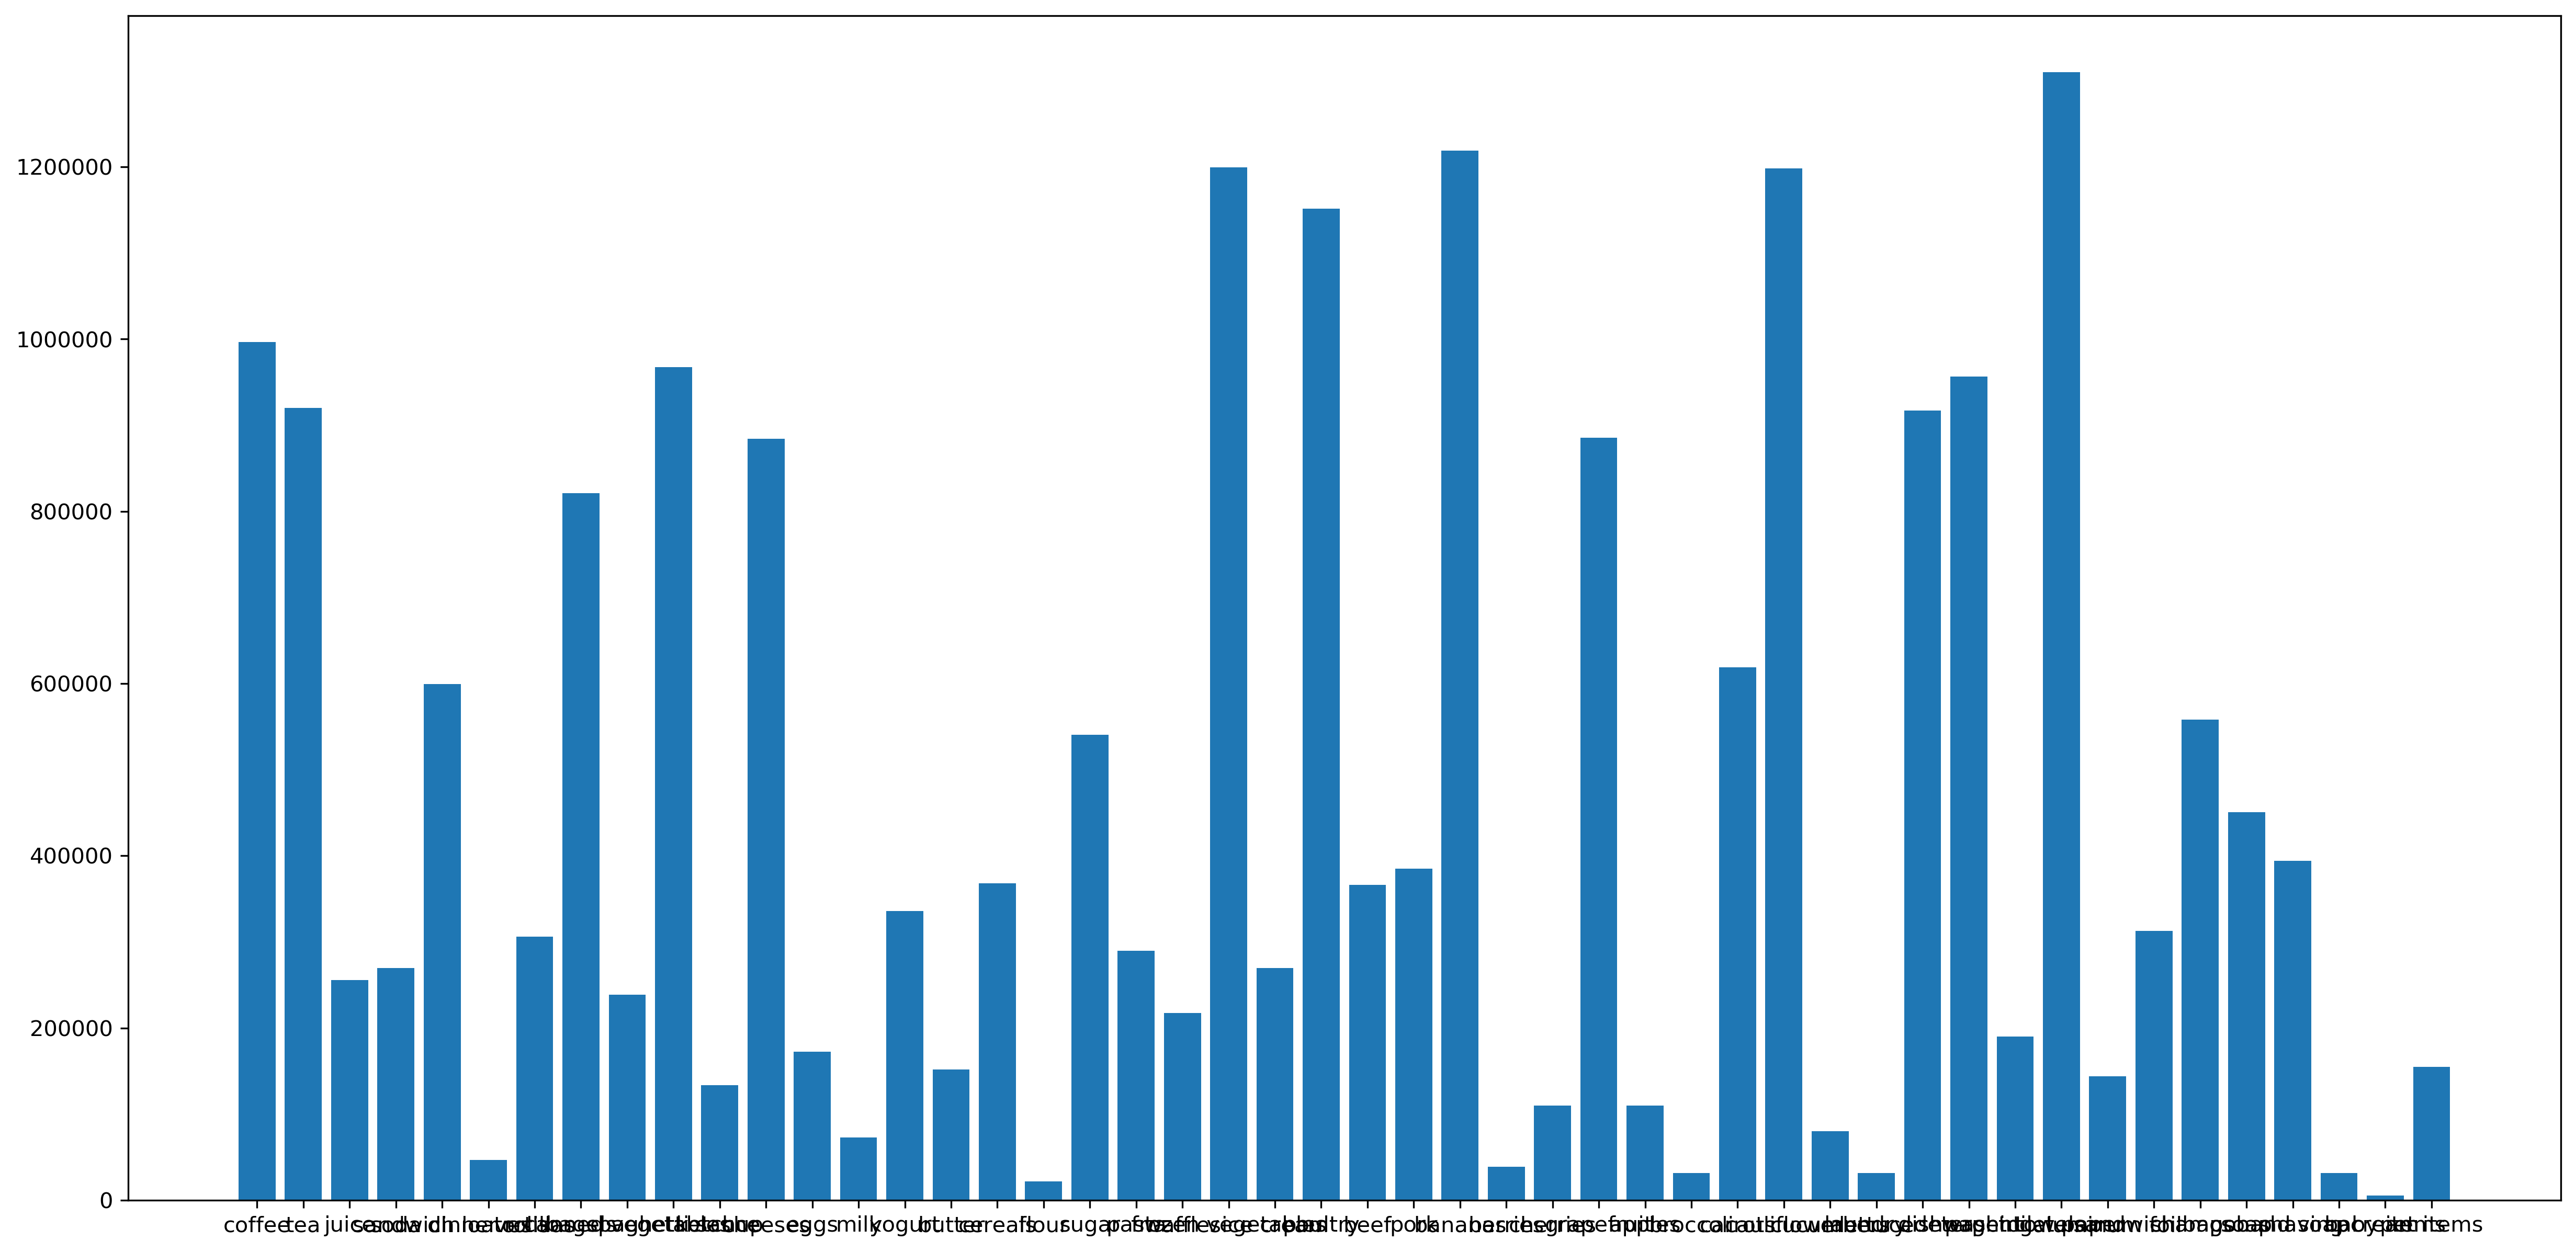

In [32]:
fig = plt.figure(figsize=(20,10),dpi=300)
plt.bar(range(len(max_buyers)), list(max_buyers.values()), align='center')
plt.xticks(range(len(max_buyers)), list(max_buyers.keys()))
plt.plot()